# Data Biography: Tracing the KKK Ledgers from the 1920s

## Introduction

When I first opened the file named "kkk-ledgers-index.csv", I had almost no idea about the historical weight it carried. After observing it carefully, I found that this dataset originated from the registration book of the Ku Klux Klan (KKK) members in Colorado in the 1920s. Initially, it was just handwritten entries in the organization's records, but now it has been digitized and transformed into a searchable and structured dataset. This transformation made me wonder: Is this still "raw" data? Or has it been shaped or filtered by numerous people who have processed it? Who recorded it? Why was it recorded? What content does it contain and what has been omitted? In the "life story" of this dataset, I attempted to trace its journey, from its origin to its current form, and think about what kind of story it tells - and what kind of story it hides.

## The Origins and Processing of the Dataset

The dataset named “kkk-ledgers-index.csv” was not originally in spreadsheet form. It originated in the 1920s and was handwritten records by members of the Ku Klux Klan in Colorado at that time. The organization had considerable political and social influence in the state at that time. These ledgers recorded names, addresses, occupations, and some personal remarks. The original documents are now kept in the History Colorado, and their file number is MSS.366.

In 2021, the Colorado Historical Society launched a project to digitize these ledgers. Each page was scanned, transcribed, and converted into a structured dataset. This process required manual interpretation: identifying handwriting, selecting field names, and handling incomplete or inconsistent records. Every decision made during this process shaped the dataset we see today.

Based on this, it is necessary to recognize that these data are not in an entirely "raw" state. They have been "cooked" - filtered and shaped through historical and modern perspectives. Understanding how the data sets are generated and processed helps us better interpret their contents and reminds us that data always exist within specific contexts.

## Dataset Structure and Contents

At first glance, this dataset looks like many other spreadsheets: rows of entries and columns of personal information. But upon closer inspection, it becomes apparent that it contains 29,635 records and 34 fields - this is a rather detailed index of the individuals listed in the original ledger. The data includes full names, residential and business addresses, cities, states, phone numbers, and page references of the original documents. There are also other fields that record whether a person's name has been deleted from the original ledger or marked with some symbol, and occasionally some remarks are attached.

Some columns appear redundant or inconsistent, such as multiple versions of address fields or incomplete phone records. Many fields contain missing values, especially in less commonly filled-in categories like "Suffix" or "Business Address." These inconsistencies suggest that the original data was not collected uniformly, and that later transcription decisions played a role in shaping what we now see.

Below is a quick summary of the dataset’s structure and sample entries:

In [33]:
import pandas as pd
import plotly.express as px

In [37]:
df = pd.read_csv("kkk-ledgers-index.csv", low_memory=False)
df.sample(5)

,itemID,Number,fullName,Prefix,Last Name,First Name,Middle Name,Suffix,residenceAddress1,residenceAddress2,...,ledger,link,Ledger Link,Page,pdfFileName,symbolExists,sNumber,sErased,Notes & Remarks,Column 29
9891,K09892,20890.0,Jas Meriwether Taylor,NaN,Taylor,Jas,Meriwether,NaN,760 Columbine,NaN,...,MSS.366.5,h-co.org/ledger2,MSS.366.5,437,mss366-5_p375-449_QC,False,True,False,NaN,NaN
28997,K29005,13144.0,Otis K Bryant,NaN,Bryant,Otis,K,NaN,NaN,NaN,...,MSS.366.4,h-co.org/ledger1,MSS.366.4,537,mss366-4_p481-540_QC,False,False,False,NaN,NaN
553,K00554,1053.0,W M Renard,NaN,Renard,W,M,NaN,NaN,NaN,...,MSS.366.5,h-co.org/ledger2,MSS.366.5,29,mss366-5_FC-p74_QC,False,False,False,NaN,NaN
18586,K18587,2518.0,Buell B Varnado,NaN,Varnado,Buell,B,NaN,NaN,NaN,...,MSS.366.4,h-co.org/ledger1,MSS.366.4,84,mss366-4_p61-120_QC,False,False,False,NaN,NaN
22847,K22850,6983.0,John James Harris,NaN,Harris,John,James,NaN,NaN,NaN,...,MSS.366.4,h-co.org/ledger1,MSS.366.4,271,mss366-4_p241-300_QC,False,False,False,NaN,NaN


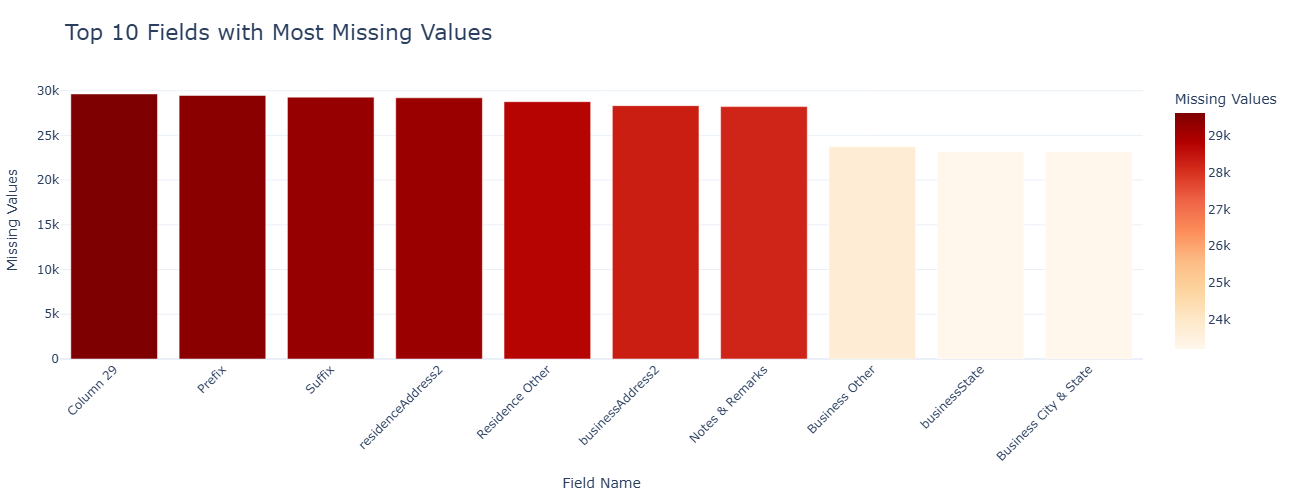

In [39]:
missing = df.isnull().sum().reset_index()
missing.columns = ['Field', 'MissingCount']
missing = missing[missing['MissingCount'] > 0].sort_values(by='MissingCount', ascending=False)

fig = px.bar(
    missing.head(10),
    x='Field',
    y='MissingCount',
    title='Top 10 Fields with Most Missing Values',
    labels={'Field': 'Field Name', 'MissingCount': 'Missing Values'},
    color='MissingCount',
    color_continuous_scale='OrRd',
    template='plotly_white'
)

fig.update_layout(
    xaxis_title='Field Name',
    yaxis_title='Missing Values',
    xaxis_tickangle=-45,
    height=500,
    width=800,
    title_font=dict(size=22),
    plot_bgcolor='white',
    margin=dict(l=40, r=40, t=80, b=80),
    showlegend=True,
    legend_title_text='Missing Count',
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Arial")
)

fig.show()

## Initial Data Exploration and Visualization

In order to better understand the composition of this dataset, I conducted an investigation on several classification fields within it. For instance, the column "State of Residence" shows the place of residence of the listed individuals, while the field "Deleted" indicates whether a certain name was deleted or crossed out in the original ledger. These variables are helpful for us to understand the geographical distribution of the activities of the Clan Party and the way of identifying internal management members.

After conducting basic statistics on the values in the "residenceState" column, it was found that the majority of entries were related to Colorado, which was consistent with the source of the dataset. In contrast, the "sErased" field indicated that a small but significant number of people were later removed or erased from the records - a decision that was likely not random. Visualizing these distributions helps to highlight the patterns in the data, but it also reinforces the point that the background situation is crucial: who was recorded and who was erased. This reflects the political tendencies of that time.

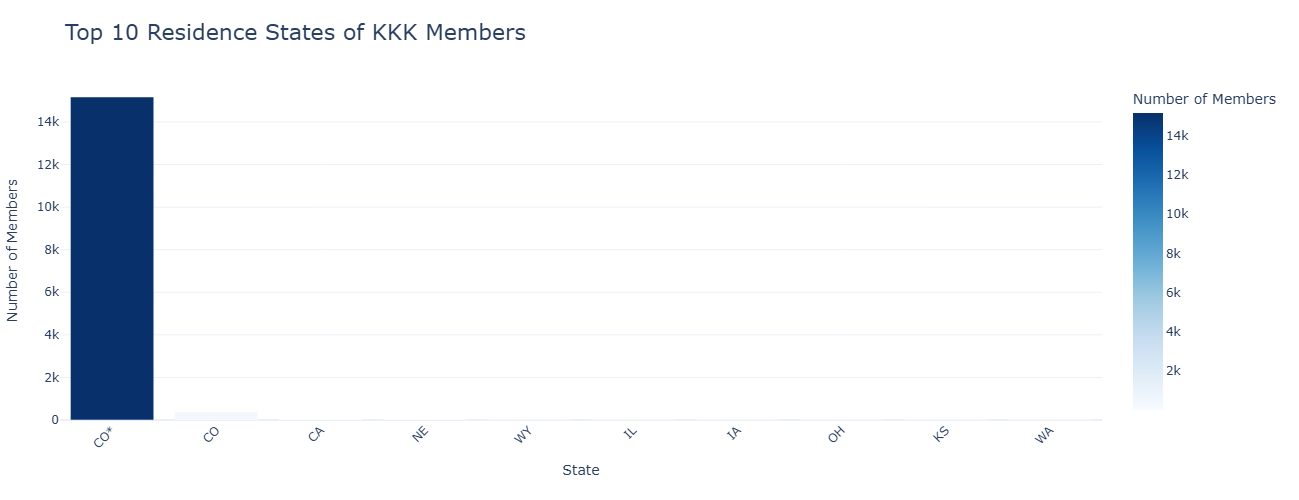

In [45]:
top_states = df['residenceState'].value_counts().nlargest(10).reset_index()
top_states.columns = ['State', 'Count']

fig = px.bar(
    top_states,
    x='State',
    y='Count',
    title='Top 10 Residence States of KKK Members',
    labels={'State': 'State', 'Count': 'Number of Members'},
    color='Count',
    color_continuous_scale='Blues',
    template='plotly_white'
)

fig.update_layout(
    xaxis_title='State',
    yaxis_title='Number of Members',
    xaxis_tickangle=-45,
    height=500,
    width=800,
    title_font=dict(size=22),
    plot_bgcolor='white',
    margin=dict(l=40, r=40, t=80, b=80),
    showlegend=True,
    legend_title_text='Member Count',
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Arial")
)

fig.show()


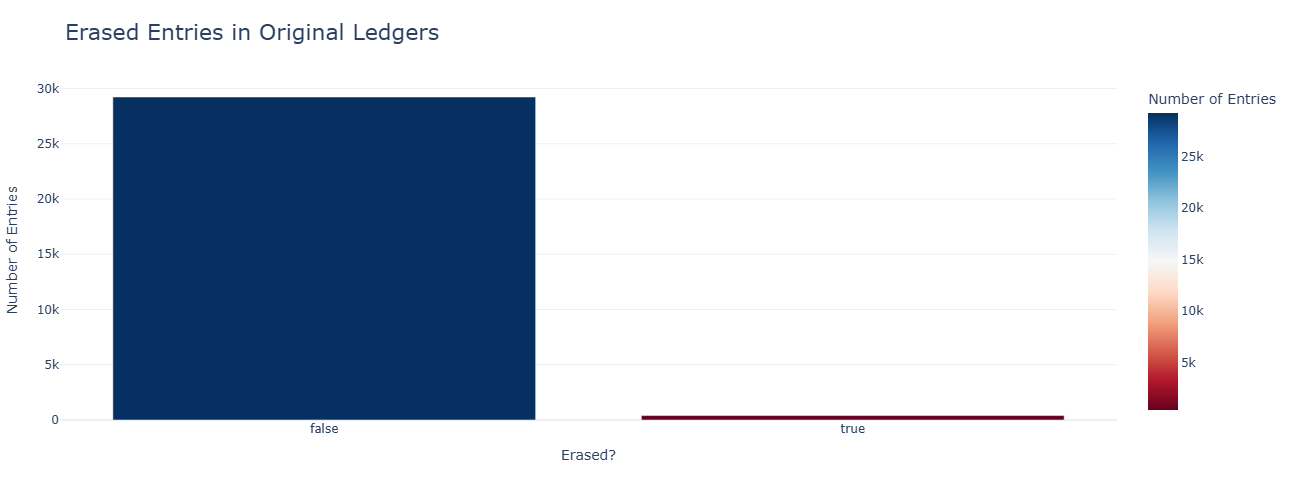

In [49]:
erased_counts = df['sErased'].value_counts().reset_index()
erased_counts.columns = ['Erased', 'Count']

fig = px.bar(
    erased_counts,
    x='Erased',
    y='Count',
    title='Erased Entries in Original Ledgers',
    labels={'Erased': 'Erased?', 'Count': 'Number of Entries'},
    color='Count',
    color_continuous_scale='RdBu',
    template='plotly_white'
)

fig.update_layout(
    xaxis_title='Erased?',
    yaxis_title='Number of Entries',
    xaxis_tickangle=0,
    height=500,
    width=800,
    title_font=dict(size=22),
    plot_bgcolor='white',
    margin=dict(l=40, r=40, t=80, b=80),
    showlegend=True,
    legend_title_text='Entry Count',
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Arial")
)

fig.show()

## Social, Cultural, and Political Contexts

To fully understand these data, one needs to understand the background environment in which they were generated. The ledger on which this dataset is based was compiled during the period when the Ku Klux Klan was most rampant in Colorado in the 1920s. At that time, the Ku Klux Klan was not only a marginalized hate group - it was also an important social and political force. Its members included police officers, judges, politicians and business leaders. In this context, recording someone in the ledger was not necessarily covert or shameful; for many people, it was precisely a symbol of status, identity and belonging.

This pertains to the "Big Dick Data" and "Cooked Data" within Data Feminism – these data may seem comprehensive or authoritative, but they often reflect the dominant power structure. The Ku Klux Klan decides who to record, how to record them, and who to exclude or erase. These decisions have as much impact on the data set as the transcription process did a century later. Moreover, recognizing "Context Matters" helps us interpret data more critically: the presence of someone's name tells us about the priorities of the organization, just as much as it does about the individual. The content recorded and the content missing reflect the values and hierarchy of the time.

## Limitations and Reflections

Although this dataset offers us an opportunity to conduct a rare and detailed study on the internal structure of the Ku Klux Klan in Colorado during the 1920s, it also has significant limitations. Many fields contain missing or inconsistent information, especially in terms of addresses and phone numbers. Some individuals have only partial records, while others seem to have no records at all. These blanks not only pose technical problems - they reflect the imbalance and subjectivity in data collection during the original ledger and digitization processes.

Furthermore, the background information provided about individuals in this dataset is very limited, only including their basic contact information. We do not know their motivations, levels of participation, or the duration of their membership as a member. The data only tells us who is included in the statistics - but does not tell us the reasons, or at whose cost it was achieved. This reminds us that data is never neutral. When we handle data, especially in the context of sensitive history, we must recognize what is obvious and what is hidden. Interpretation of ethics is not only about analysis, but also requires reflection.

## Conclusion

Writing a data biography has made me realize that data sets are never as simple as rows and columns – they are records of human decisions, influenced by background, power, and intent. The content provided by the kkk-ledgers-index.csv file is far more than just historical facts; it also offers a perspective that enables us to glimpse how certain individuals and institutions choose to present themselves and others. From handwritten ledgers to digital spreadsheets, this data set has gone through numerous users and different interpretations. Recognizing this journey is crucial for responsible data use. We cannot view data as objective truths but should regard them as constructed products. Only in this way can we truly understand what they reveal – as well as what they hide.

<div align="center">
  <img
    src="../assets/img/example.png"
    width="60%"
    style="border: 2px solid"
    alt="Description of image"
  />
  <figcaption style="font-style: italic">
    Example of Original Ledger Image
  </figcaption>
</div>